In [ ]:
# Import Libraries
import pandas as pd
import io
import numpy as np
import re

import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.corpus import wordnet
from nltk.corpus import stopwords

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('latest_ticket_data.csv')

In [ ]:
def get_only_chars(line):

    clean_line = ""

    line = line.replace("’", "")
    line = line.replace("'", "")
    line = line.replace("-", " ") #replace hyphens with spaces
    line = line.replace("\t", " ")
    line = line.replace("\n", " ")
    line = line.lower()

    for char in line:
        if char in 'qwertyuiopasdfghjklzxcvbnm ':
            clean_line += char
        else:
            clean_line += ' '

    clean_line = re.sub(' +',' ',clean_line) #delete extra spaces
    if clean_line[0] == ' ':
        clean_line = clean_line[1:]
    return clean_line

In [ ]:
df['Description'] = df['Description'].apply(lambda x: get_only_chars(x))

In [ ]:
df['Tokenized']=[nltk.word_tokenize(i) for i in df['Description']]

In [ ]:
df['pos_tagged'] = [nltk.pos_tag(i) for i in df['Tokenized']]

In [ ]:
df['NN_tagged'] = df['pos_tagged'].apply(lambda item:[w for w,t in item if t=='NN'])

In [ ]:
df['NN_Description'] = df.NN_tagged.map(lambda x: ' '.join(x))

In [ ]:
stop_words = stopwords.words('english')
custom_stop_words = ['hi', 'since', 'please', 'best', 'regards', 'thank', 'thanks', 'hello', 'sent', 'great', 'dear', 'help', 'kind']
time_words = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december',
              'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'today' , 'yesterday', 'tomorrow',
              'hour', 'hours', 'time', 'times', 'timelines', 'date', 'day', 'days', 'am', 'pm', 'morning', 'noon', 'afternoon', 'evening',
              'night', 'winter', 'summer', 'rain', 'cold']

def remove_stop_words(text):
    pattern = re.compile(r'\b(' + r'|'.join(stop_words) + r')\b\s*')
    text = pattern.sub('', text)
    return text

def remove_custom_words(text):
    pattern = re.compile(r'\b(' + r'|'.join(custom_stop_words) + r')\b\s*')
    text = pattern.sub('', text)
    return text

def remove_time_words(text):
    pattern = re.compile(r'\b(' + r'|'.join(time_words) + r')\b\s*')
    text = pattern.sub('', text)
    return text

df['NN_Description'] = df["NN_Description"].map(lambda x: remove_stop_words(x))
df['NN_Description'] = df["NN_Description"].map(lambda x: remove_custom_words(x))
df['NN_Description'] = df["NN_Description"].map(lambda x: remove_time_words(x))

In [ ]:
LE = LabelEncoder()
df['Label'] = LE.fit_transform(df['Category'])
print(df)

                                            Description     Category  \
0     hi since recruiter lead permission approve req...  Application   
1     re expire days hi ask help update passwords co...  Application   
2     verification warning hi has got attached pleas...  Application   
3     please dear looks blacklisted receiving mails ...  Application   
4     dear modules report report cost thank much reg...  Application   
...                                                 ...          ...   
2995  sent tuesday feedback follow up conf call hell...     Database   
2996  sent monday issues hi keep getting errors whil...     Database   
2997  sent monday en working properly hi guys we hav...     Database   
2998  sent wednesday july hi please log incident for...     Database   
2999  sent tuesday july connection issues hello have...     Database   

                                              Tokenized  \
0     [hi, since, recruiter, lead, permission, appro...   
1     [re, expire

In [ ]:
df_0 = df.loc[(df['Label'] == 0)]
df_1 = df.loc[(df['Label'] == 1)]
df_2 = df.loc[(df['Label'] == 2)]
df_3 = df.loc[(df['Label'] == 3)]
df_4 = df.loc[(df['Label'] == 4)]

<Axes: title={'center': 'Top 30 TF-IDF Words'}>

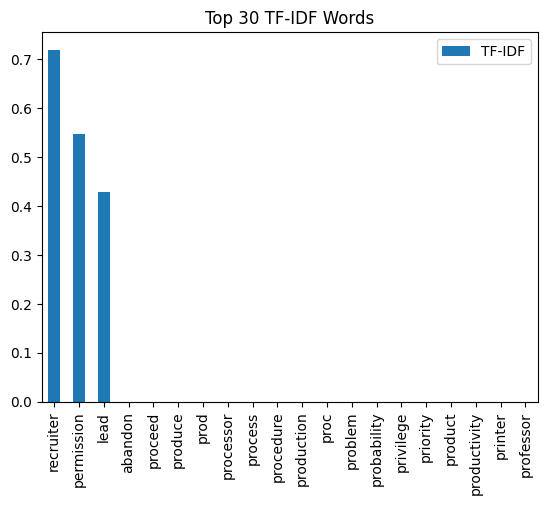

In [ ]:
# Instantiate
vectorizer = TfidfVectorizer()
# Fit the data
tfidf_0 = vectorizer.fit_transform(df_0['NN_Description'])
# Create a dataframe of TFIDF
tfidf_df_0 = pd.DataFrame(tfidf_0[0].T.todense(),
                      index=vectorizer.get_feature_names_out(),
                      columns=["TF-IDF"])
# Sort
tfidf_df_0 = tfidf_df_0.sort_values('TF-IDF', ascending=False)
tfidf_df_0[:20].plot.bar(title="Top 30 TF-IDF Words")

In [ ]:
tf_keyword_0 = ['recruiter','permission', 'lead']
tf_keyword_0

['recruiter', 'permission', 'lead']

<Axes: title={'center': 'Top 30 TF-IDF Words'}>

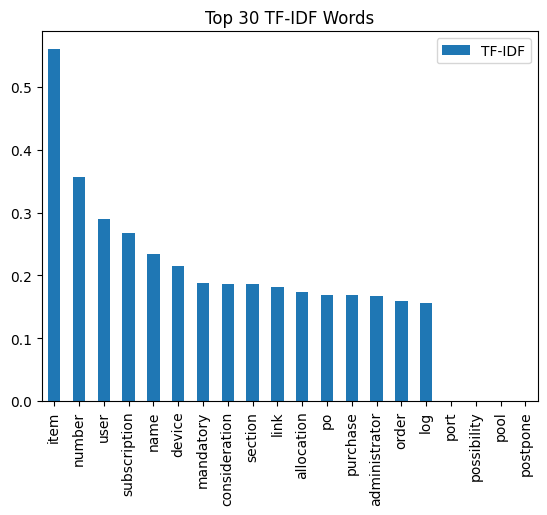

In [ ]:
# Instantiate
vectorizer = TfidfVectorizer()
# Fit the data
tfidf_1 = vectorizer.fit_transform(df_1['NN_Description'])
# Create a dataframe of TFIDF
tfidf_df_1 = pd.DataFrame(tfidf_1[0].T.todense(),
                      index=vectorizer.get_feature_names_out(),
                      columns=["TF-IDF"])
# Sort
tfidf_df_1 = tfidf_df_1.sort_values('TF-IDF', ascending=False)
tfidf_df_1[:20].plot.bar(title="Top 30 TF-IDF Words")

In [ ]:
tf_keyword_1 = ['item','number','user','subscription','name']
tf_keyword_1

['item', 'number', 'user', 'subscription', 'name']

<Axes: title={'center': 'Top 30 TF-IDF Words'}>

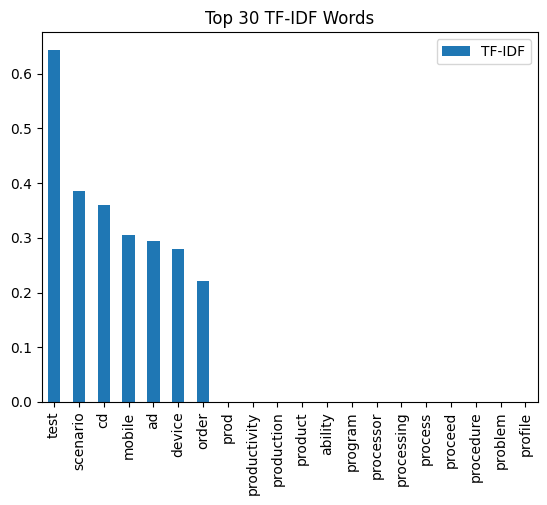

In [ ]:
# Instantiate
vectorizer = TfidfVectorizer()
# Fit the data
tfidf_2 = vectorizer.fit_transform(df_2['NN_Description'])
# Create a dataframe of TFIDF
tfidf_df_2 = pd.DataFrame(tfidf_2[0].T.todense(),
                      index=vectorizer.get_feature_names_out(),
                      columns=["TF-IDF"])
# Sort
tfidf_df_2 = tfidf_df_2.sort_values('TF-IDF', ascending=False)
tfidf_df_2[:20].plot.bar(title="Top 30 TF-IDF Words")

In [ ]:
tf_keyword_2 = ['test','scenario','mobile','device','order']
tf_keyword_2

['test', 'scenario', 'mobile', 'device', 'order']

<Axes: title={'center': 'Top 30 TF-IDF Words'}>

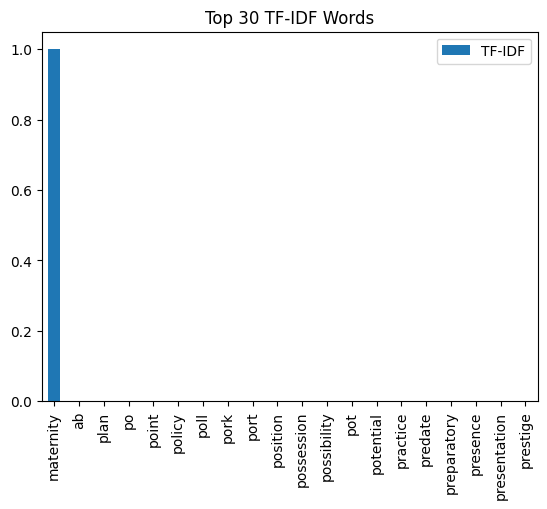

In [ ]:
# Instantiate
vectorizer = TfidfVectorizer()
# Fit the data
tfidf_3 = vectorizer.fit_transform(df_3['NN_Description'])
# Create a dataframe of TFIDF
tfidf_df_3 = pd.DataFrame(tfidf_3[0].T.todense(),
                      index=vectorizer.get_feature_names_out(),
                      columns=["TF-IDF"])
# Sort
tfidf_df_3 = tfidf_df_3.sort_values('TF-IDF', ascending=False)
# Bar Plot
tfidf_df_3[:20].plot.bar(title="Top 30 TF-IDF Words")

In [ ]:
tf_keyword_3 = ['maternity']
tf_keyword_3

['maternity']

<Axes: title={'center': 'Top 30 TF-IDF Words'}>

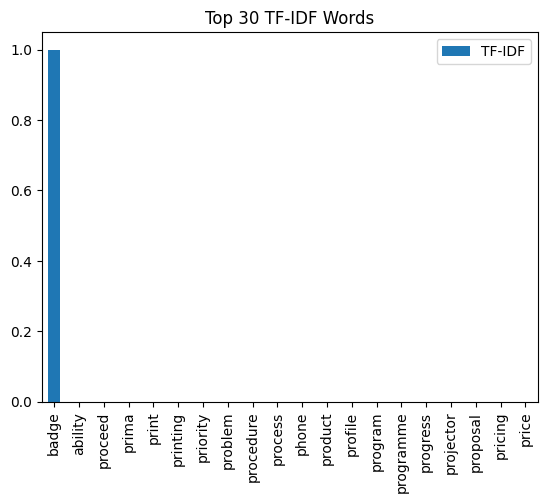

In [ ]:
# Instantiate
vectorizer = TfidfVectorizer()
# Fit the data
tfidf_4 = vectorizer.fit_transform(df_4['NN_Description'])
# Create a dataframe of TFIDF
tfidf_df_4 = pd.DataFrame(tfidf_4[0].T.todense(),
                      index=vectorizer.get_feature_names_out(),
                      columns=["TF-IDF"])
# Sort
tfidf_df_4 = tfidf_df_4.sort_values('TF-IDF', ascending=False)
tfidf_df_4[:20].plot.bar(title="Top 30 TF-IDF Words")

In [ ]:
tf_keyword_4 = ['badge']
tf_keyword_4

['badge']

In [ ]:
topics =[tf_keyword_0,tf_keyword_1,tf_keyword_2,tf_keyword_3,tf_keyword_4]

In [ ]:
def WordnetShortestPath_labelscore(a):
  lowest_netavg=100
  lowest_label=0
  label=-1
  #print(a)
  words = nltk.word_tokenize(a)
  for z in topics:
    total=0
    counter=0
    #print(z)
    for x in z:
      count=0
      avg=0
      sum=0
      for y in words:
        if(wordnet.synsets(x) and wordnet.synsets(y)):
          syn1 = wordnet.synsets(x)[0]
          syn2 = wordnet.synsets(y)[0]
          if(syn1.pos() == 'n' and syn2.pos() == 'n'):
            #print("Shortest path between ",x," and ",y," is: ", syn1.shortest_path_distance(syn2))
            sum=sum+syn1.shortest_path_distance(syn2)
            count=count+1
      if(count==0):
        avg=0
      else:
        avg=sum/count
      total=total+avg
      counter=counter+1
      #print(sum)
      #print(count)
      #print(avg)
    if(counter==0):
      netavg=0
    else:
      netavg=total/counter
    #print(counter)
    #print("Total score for ",z," is: ",total)
    #print("Net average for ",z," is: ",netavg)
    label=label+1
    if(netavg<lowest_netavg):
      lowest_netavg=netavg
      lowest_label=label
      #print("label: ",label," has shortest path value: ",lowest_netavg)
  return lowest_label,lowest_netavg

In [ ]:
df[ ["WSP_Label","WSP_Value"] ] = df["Description"].apply(WordnetShortestPath_labelscore).apply(pd.Series)

In [ ]:
df[ ["NN_WSP_Label","NN_WSP_Value"] ] = df["NN_Description"].apply(WordnetShortestPath_labelscore).apply(pd.Series)

In [ ]:
df["WSP_Label"] = df["WSP_Label"].astype(int)

In [ ]:
df["NN_WSP_Label"] = df["NN_WSP_Label"].astype(int)

In [ ]:
df

,Description,Category,Tokenized,pos_tagged,NN_tagged,NN_Description,Label,WSP_Label,WSP_Value,NN_WSP_Label,NN_WSP_Value
0,hi since recruiter lead permission approve req...,Application,"[hi, since, recruiter, lead, permission, appro...","[(hi, NN), (since, IN), (recruiter, NN), (lead...","[hi, recruiter, lead, permission]",recruiter lead permission,0,0,9.481481,0,7.555556
1,re expire days hi ask help update passwords co...,Application,"[re, expire, days, hi, ask, help, update, pass...","[(re, NN), (expire, NN), (days, NNS), (hi, VBP...","[re, expire, help, expire, hi, expiration, ple...",expire expire expiration prolongation expire o...,0,1,9.804938,1,9.730435
2,verification warning hi has got attached pleas...,Application,"[verification, warning, hi, has, got, attached...","[(verification, NN), (warning, VBG), (hi, NN),...","[verification, hi, please, analyst, verification]",verification analyst verification,0,1,10.836364,1,10.266667
3,please dear looks blacklisted receiving mails ...,Application,"[please, dear, looks, blacklisted, receiving, ...","[(please, VB), (dear, JJ), (looks, NNS), (blac...","[kind, engineer]",engineer,0,1,9.777778,0,8.000000
4,dear modules report report cost thank much reg...,Application,"[dear, modules, report, report, cost, thank, m...","[(dear, JJ), (modules, NNS), (report, VB), (re...","[report, cost]",report cost,0,1,9.171429,1,8.400000
...,...,...,...,...,...,...,...,...,...,...,...
2995,sent tuesday feedback follow up conf call hell...,Database,"[sent, tuesday, feedback, follow, up, conf, ca...","[(sent, NN), (tuesday, NN), (feedback, NN), (f...","[sent, tuesday, feedback, conf, call, hello, s...",feedback conf call setup meeting side meeting ...,1,1,10.489655,1,10.414815
2996,sent monday issues hi keep getting errors whil...,Database,"[sent, monday, issues, hi, keep, getting, erro...","[(sent, NN), (monday, NN), (issues, NNS), (hi,...","[sent, monday, please, help]",,1,1,9.907692,0,0.000000
2997,sent monday en working properly hi guys we hav...,Database,"[sent, monday, en, working, properly, hi, guys...","[(sent, NN), (monday, NN), (en, IN), (working,...","[sent, monday, number, meeting, room, dialer, ...",number meeting room dialer pad multiple access...,1,1,10.257627,1,9.523810
2998,sent wednesday july hi please log incident for...,Database,"[sent, wednesday, july, hi, please, log, incid...","[(sent, NN), (wednesday, NN), (july, NN), (hi,...","[sent, wednesday, july, please, log, incident,...",log incident assistance mo el ticket con colom...,1,1,10.130159,1,9.655172


In [ ]:
accuracy_score(df['Label'], df['WSP_Label'])

0.202

In [ ]:
accuracy_score(df['Label'], df['NN_WSP_Label'])

0.22566666666666665

In [ ]:
df_0 = df.loc[(df['Label'] == 0)]
df_1 = df.loc[(df['Label'] == 1)]
df_2 = df.loc[(df['Label'] == 2)]
df_3 = df.loc[(df['Label'] == 3)]
df_4 = df.loc[(df['Label'] == 4)]

In [ ]:
accuracy_score(df_0['Label'], df_0['WSP_Label'])

0.06166666666666667

In [ ]:
accuracy_score(df_0['Label'], df_0['NN_WSP_Label'])

0.20333333333333334

In [ ]:
accuracy_score(df_1['Label'], df_1['WSP_Label'])

0.8983333333333333

In [ ]:
accuracy_score(df_1['Label'], df_1['NN_WSP_Label'])

0.8133333333333334

In [ ]:
accuracy_score(df_2['Label'], df_2['WSP_Label'])

0.0

In [ ]:
accuracy_score(df_2['Label'], df_2['NN_WSP_Label'])

0.013333333333333334

In [ ]:
accuracy_score(df_3['Label'], df_3['WSP_Label'])

0.04

In [ ]:
accuracy_score(df_3['Label'], df_3['NN_WSP_Label'])

0.08

In [ ]:
accuracy_score(df_4['Label'], df_4['WSP_Label'])

0.01

In [ ]:
accuracy_score(df_4['Label'], df_4['NN_WSP_Label'])

0.018333333333333333

In [ ]:
def WordnetWUP_labelscore(a):
  highest_netavg=0
  highest_label=0
  label=-1
  #print(a)
  words = nltk.word_tokenize(a)
  for z in topics:
    total=0
    counter=0
    #print(z)
    for x in z:
      count=0
      avg=0
      sum=0
      for y in words:
        if(wordnet.synsets(x) and wordnet.synsets(y)):
          syn1 = wordnet.synsets(x)[0]
          syn2 = wordnet.synsets(y)[0]
          if(syn1.pos() == 'n' and syn2.pos() == 'n'):
            #print("Shortest path between ",x," and ",y," is: ", syn1.wup_similarity(syn2))
            sum=sum+syn1.wup_similarity(syn2)
            count=count+1
      if(count==0):
        avg=0
      else:
        avg=sum/count
      total=total+avg
      counter=counter+1
      #print(sum)
      #print(count)
      #print(avg)
    if(counter==0):
      netavg=0
    else:
      netavg=total/counter
    #print(counter)
    #print("Total score for ",z," is: ",total)
    #print("Net average for ",z," is: ",netavg)
    label=label+1
    if(netavg>highest_netavg):
      highest_netavg=netavg
      highest_label=label
      #print("label: ",label," has shortest path value: ",lowest_netavg)
  return highest_label,highest_netavg

In [ ]:
df[ ["WUP_Label","WUP_Value"] ] = df["Description"].apply(WordnetWUP_labelscore).apply(pd.Series)

In [ ]:
df[ ["NN_WUP_Label","NN_WUP_Value"] ] = df["NN_Description"].apply(WordnetWUP_labelscore).apply(pd.Series)

In [ ]:
df["WUP_Label"] = df["WUP_Label"].astype(int)

In [ ]:
df["NN_WUP_Label"] = df["NN_WUP_Label"].astype(int)

In [ ]:
df

,Description,Category,Tokenized,pos_tagged,NN_tagged,NN_Description,Label,WSP_Label,WSP_Value,NN_WSP_Label,NN_WSP_Value,WUP_Label,WUP_Value,NN_WUP_Label,NN_WUP_Value
0,hi since recruiter lead permission approve req...,Application,"[hi, since, recruiter, lead, permission, appro...","[(hi, NN), (since, IN), (recruiter, NN), (lead...","[hi, recruiter, lead, permission]",recruiter lead permission,0,0,9.481481,0,7.555556,0,0.363809,0,0.463085
1,re expire days hi ask help update passwords co...,Application,"[re, expire, days, hi, ask, help, update, pass...","[(re, NN), (expire, NN), (days, NNS), (hi, VBP...","[re, expire, help, expire, hi, expiration, ple...",expire expire expiration prolongation expire o...,0,1,9.804938,1,9.730435,1,0.280167,1,0.280997
2,verification warning hi has got attached pleas...,Application,"[verification, warning, hi, has, got, attached...","[(verification, NN), (warning, VBG), (hi, NN),...","[verification, hi, please, analyst, verification]",verification analyst verification,0,1,10.836364,1,10.266667,4,0.310190,4,0.337963
3,please dear looks blacklisted receiving mails ...,Application,"[please, dear, looks, blacklisted, receiving, ...","[(please, VB), (dear, JJ), (looks, NNS), (blac...","[kind, engineer]",engineer,0,1,9.777778,0,8.000000,0,0.291903,0,0.326688
4,dear modules report report cost thank much reg...,Application,"[dear, modules, report, report, cost, thank, m...","[(dear, JJ), (modules, NNS), (report, VB), (re...","[report, cost]",report cost,0,1,9.171429,1,8.400000,1,0.299222,1,0.363233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,sent tuesday feedback follow up conf call hell...,Database,"[sent, tuesday, feedback, follow, up, conf, ca...","[(sent, NN), (tuesday, NN), (feedback, NN), (f...","[sent, tuesday, feedback, conf, call, hello, s...",feedback conf call setup meeting side meeting ...,1,1,10.489655,1,10.414815,1,0.267443,1,0.262816
2996,sent monday issues hi keep getting errors whil...,Database,"[sent, monday, issues, hi, keep, getting, erro...","[(sent, NN), (monday, NN), (issues, NNS), (hi,...","[sent, monday, please, help]",,1,1,9.907692,0,0.000000,4,0.323321,0,0.000000
2997,sent monday en working properly hi guys we hav...,Database,"[sent, monday, en, working, properly, hi, guys...","[(sent, NN), (monday, NN), (en, IN), (working,...","[sent, monday, number, meeting, room, dialer, ...",number meeting room dialer pad multiple access...,1,1,10.257627,1,9.523810,1,0.264999,3,0.306905
2998,sent wednesday july hi please log incident for...,Database,"[sent, wednesday, july, hi, please, log, incid...","[(sent, NN), (wednesday, NN), (july, NN), (hi,...","[sent, wednesday, july, please, log, incident,...",log incident assistance mo el ticket con colom...,1,1,10.130159,1,9.655172,1,0.284620,1,0.293325


In [ ]:
df_0 = df.loc[(df['Label'] == 0)]
df_1 = df.loc[(df['Label'] == 1)]
df_2 = df.loc[(df['Label'] == 2)]
df_3 = df.loc[(df['Label'] == 3)]
df_4 = df.loc[(df['Label'] == 4)]

In [ ]:
accuracy_score(df['Label'], df['WUP_Label'])

0.21266666666666667

In [ ]:
accuracy_score(df['Label'], df['NN_WUP_Label'])

0.204

In [ ]:
accuracy_score(df_0['Label'], df_0['WUP_Label'])

0.3416666666666667

In [ ]:
accuracy_score(df_0['Label'], df_0['NN_WUP_Label'])

0.3566666666666667

In [ ]:
accuracy_score(df_1['Label'], df_1['WUP_Label'])

0.43

In [ ]:
accuracy_score(df_1['Label'], df_1['NN_WUP_Label'])

0.3383333333333333

In [ ]:
accuracy_score(df_2['Label'], df_2['WUP_Label'])

0.065

In [ ]:
accuracy_score(df_2['Label'], df_2['NN_WUP_Label'])

0.12666666666666668

In [ ]:
accuracy_score(df_3['Label'], df_3['WUP_Label'])

0.10833333333333334

In [ ]:
accuracy_score(df_3['Label'], df_3['NN_WUP_Label'])

0.13166666666666665

In [ ]:
accuracy_score(df_4['Label'], df_4['WUP_Label'])

0.11833333333333333

In [ ]:
accuracy_score(df_4['Label'], df_4['NN_WUP_Label'])

0.06666666666666667